In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
res = pd.read_csv("results.csv")
res

,Unnamed: 0,trial_id,iteration,test_metric,strategy,seed,score
0,0,d6709_00000,0,0.606780,least_confidence,1,336.447838
1,1,d6709_00000,1,0.500000,least_confidence,1,336.447838
2,2,d6709_00000,2,0.917950,least_confidence,1,336.447838
3,3,d6709_00000,3,0.913364,least_confidence,1,336.447838
4,4,d6709_00000,4,0.890436,least_confidence,1,336.447838
...,...,...,...,...,...,...,...
9070,9070,d6709_00024,358,0.932362,random,5,330.971258
9071,9071,d6709_00024,359,0.927776,random,5,330.971258
9072,9072,d6709_00024,360,0.946446,random,5,330.971258
9073,9073,d6709_00024,361,0.920734,random,5,330.971258


In [3]:
res[res.strategy=="random"]

,Unnamed: 0,trial_id,iteration,test_metric,strategy,seed,score
7260,7260,d6709_00020,0,0.537995,random,1,328.643793
7261,7261,d6709_00020,1,0.660170,random,1,328.643793
7262,7262,d6709_00020,2,0.841467,random,1,328.643793
7263,7263,d6709_00020,3,0.834753,random,1,328.643793
7264,7264,d6709_00020,4,0.841795,random,1,328.643793
...,...,...,...,...,...,...,...
9070,9070,d6709_00024,358,0.932362,random,5,330.971258
9071,9071,d6709_00024,359,0.927776,random,5,330.971258
9072,9072,d6709_00024,360,0.946446,random,5,330.971258
9073,9073,d6709_00024,361,0.920734,random,5,330.971258


In [4]:
aucs = res.drop_duplicates(subset=["strategy","seed"])
agg = aucs.groupby("strategy")["score"]
mean_aucs, std_aucs = agg.mean(), agg.std()
aucs = pd.concat((mean_aucs, std_aucs), axis=1)
aucs.columns = ["avg", "stdv"]
aucs["score"] = aucs.apply(lambda row: f"{row.avg:.2f} ± {row.stdv:.2f}"  ,axis=1)
label_to_auc = dict(zip(aucs.index, aucs["score"]))

/var/folders/02/fbyrwz_s7tg4vmbm1kswhxp40000gp/T/ipykernel_38824/2952143151.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([int(label) + 10 for label in current_xticks])


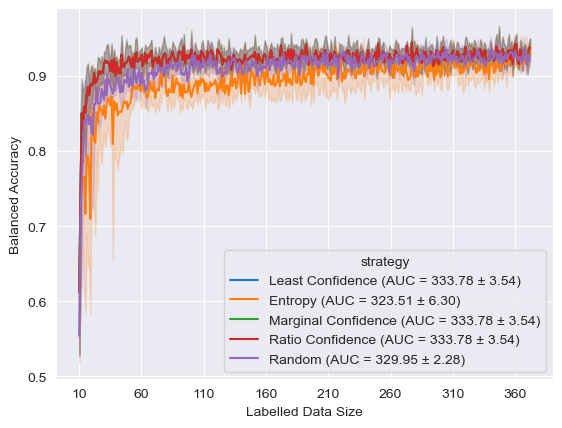

In [5]:
sns.set_style("darkgrid")

sns.lineplot(data=res, x="iteration", y="test_metric", hue="strategy")
plt.ylabel("Balanced Accuracy")
plt.xlabel("Labelled Data Size")

current_xticks = plt.gca().get_xticks()
plt.gca().set_xticklabels([int(label) + 10 for label in current_xticks])

ax = plt.gca()
legend = ax.get_legend()
for text in legend.get_texts():
    label = text.get_text()
    new_label = f"{label.replace('_', ' ').title()} (AUC = {label_to_auc[label]})"
    text.set_text(new_label)
    

for spine in ax.spines.values():
    spine.set_visible(False)